# **7. Algoritmo de Deutsch-Josza**

# **Dive in Learning**

# ***Diplomado en Computación y Programación Cuántica***

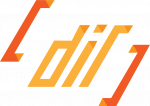

In [ ]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install qiskit[visualization]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=434187a395befdacdaeb75577a42291d1b8aa09747762fcf9bee29b691464845
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [ ]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 84.2 MB/s eta 0:00:00


In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator
from qiskit.visualization import array_to_latex

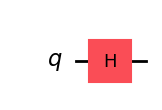

In [ ]:
qc_plus = QuantumCircuit(1)

qc_plus.h(0)

qc_plus.draw('mpl')

In [ ]:
Statevector(qc_plus).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

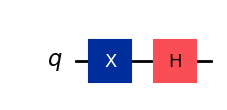

In [ ]:
qc_minus = QuantumCircuit(1)

qc_minus.x(0)
qc_minus.h(0)

qc_minus.draw('mpl')

In [ ]:
Statevector(qc_minus).draw('latex', max_size=16, prefix="\\vert\\psi\\rangle = ")

<IPython.core.display.Latex object>

# **Algoritmo de Deutsch-Jozsa**

El **algoritmo de Deutsch-Jozsa** es un algoritmo cuántico determinista propuesto por David Deutsch y Richard Jozsa en 1992 [[Deutsch, D., Jozsa, R.](https://royalsocietypublishing.org/doi/10.1098/rspa.1992.0167)].

El algoritmo de Deutsch-Jozsa generaliza el algoritmo de Deutsch y revela la posibilidad de aceleraciones exponenciales utilizando computadoras cuánticas.

$$ $$

$$ $$


Se tiene una función booleana oculta $f$, conocida como *caja negra* o como **oráculo**, que toma como entrada una cadena de bits y devuelve $0$ o $1$, es decir:

$$f\big(\{x_0, x_1, x_2, \cdots\}\big)\rightarrow0 \text{ o } 1 \text{, donde } x_n \text{ es } 0 \text{ o } 1$$

La propiedad de la función booleana dada es que se garantiza que sea **balanceada** o **constante**. Una función *constante* devuelve siempre $0$ o siempre $1$ para cualquier entrada, mientras que una función *balanceada* devuelve $0$ para exactamente la mitad de todas las entradas y $1$ para la otra mitad.

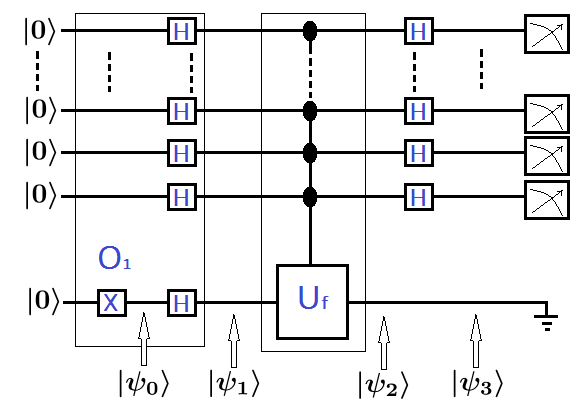

Ahora, repasemos los pasos del algoritmo:

**1.** Prepararemos dos registros cuánticos. El primero es un registro de $n$ qubits inicializado a $|0⟩$, y el segundo es un registro de un qubit inicializado a $|1⟩$:

$$\vert\psi_{0}\rangle =\vert 0\rangle^{\otimes n}\vert 1\rangle$$

**2.** Aplicaremos una compuerta Hadamard a cada qubit

$$\vert\psi_{1}\rangle =H^{\otimes n}\vert 0\rangle^{\otimes n}H\vert 1\rangle$$

$$\vert\psi_{1}\rangle =\frac{1}{\sqrt{2^{n}}}\sum_{x\in\{0,1 \}^{n}} \vert x\rangle\left(\frac{\vert 0\rangle-\vert 1\rangle}{\sqrt{2}}\right)$$

**3.** Aplicaremos el oráculo cuántico $U_{f}$ al estado $\vert\psi_{1}\rangle$

$$\vert\psi_{2}\rangle =U_{f}\vert\psi_{1}\rangle,\qquad U_f\vert x\rangle =(-1)^{f(x)}\vert x\rangle$$

\begin{equation}
\vert\psi_{2}\rangle = \frac{1}{\sqrt{2^{n}}}\sum_{x\in\{0,1\}^{n}}(-1)^{f(x)}\vert x\rangle\left(\frac{\vert 0\rangle-\vert 1\rangle}{\sqrt{2}}\right)
\end{equation}

**4.** En este punto, se **ignorara el segundo registro de qubit** y **apliquemos una compuerta Hadamard a cada qubit del primer registro**:

$$H^{\otimes n}\vert x\rangle =\frac{1}{\sqrt{2^{n}}}\sum_{y}(-1)^{x\cdot y}\vert y\rangle$$

\begin{align}
\vert\psi_{3}\rangle & =\frac{1}{2^{n}}\sum_{{x\in\{0,1\}^{n}}}(-1)^{f(x)}\left[\sum_{y}(-1)^{x\cdot y}\vert y\rangle\right]\\\\
& = \frac{1}{2^{n}}\sum_{y}\left[\sum_{{x\in\{0,1\}^{n}}}(-1)^{f(x)}(-1)^{x\cdot y}\right]\vert y\rangle
\end{align}

donde $x⋅y = x_0 y_0 \oplus x_1 y_1 \oplus ... \oplus x_{n-1}y_{n-1}$ es la suma del producto bit a bit.

**5.** Medimos el primer registro. Observe que la probabilidad de medición, $\vert 0\rangle^{\otimes n}=\left\vert\frac{1}{2^{n}}\sum(-1)^{f(x)}\right\vert^{2}$, se evalúa como $f(x)=1$ si es constante y cuando $f(x)=0$ también lo es.

# **Oráculos Cuánticos**

Veamos diferentes maneras de crear un oráculo cuántico.

Para una **función constante**, es simple:

    if f(x) = 0, then apply the I gate to the qubit in register 2.
    if f(x) = 1, then apply the X gate to the qubit in register 2.

Para una **función balanceada**, podemos crear muchos circuitos diferentes. Una forma de garantizar que nuestro circuito esté balanceado es realizando una $CNOT$ para cada qubit del *registro 1*, con el qubit del *registro 2* como objetivo. Por ejemplo:

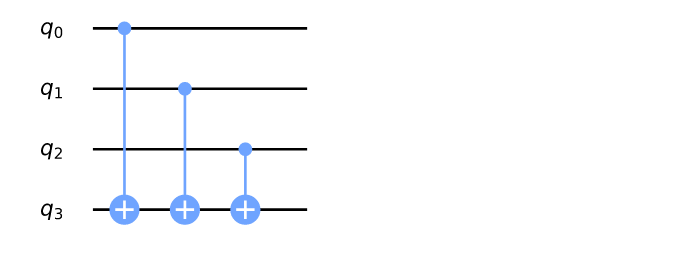

En la imagen anterior, los tres qubits superiores forman el registro de entrada, y el qubit inferior es el registro de salida. En la siguiente tabla, podemos ver qué estados de entrada generan qué salida:

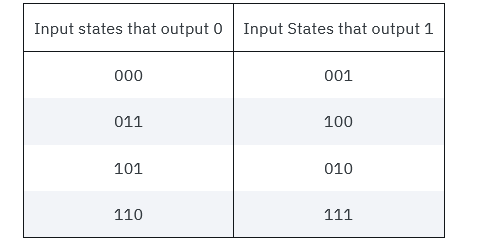

# **Algoritmo completo**

Ahora implementamos el algoritmo Deutsch-Jozsa para el ejemplo de una función de tres bits, con oráculos constantes y balanceados. Primero, realicemos las importaciones:

In [ ]:
# importing Qiskit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram


# **Oráculo balanceado**

Tras el paso 2, nuestro registro de entrada es una superposición igual de todos los estados de la base computacional. Cuando el oráculo está balanceado, la fase inversa añade una fase negativa a exactamente la mitad de estos estados:

$$U_{f}\vert\psi_{1}\rangle =\frac{1}{\sqrt{2^{n}}}\begin{bmatrix}1\\ 1\\ 1\\ \vdots\\ 1 \end{bmatrix}=\frac{1}{\sqrt{2^{n}}}\begin{bmatrix}-1\\ 1\\ -1\\ \vdots\\ 1 \end{bmatrix}$$

El estado cuántico tras consultar el oráculo es ortogonal al estado cuántico anterior. Por lo tanto, en el paso 4, al aplicar las compuertas $H$, debemos obtener un estado cuántico ortogonal a $|00....0⟩$.

# **Ejemplo**

Veamos un ejemplo específico para una función balanceada de dos bits:

Considere una función de dos bits $f(x_0, x_1) = x_0 \oplus x_1$ tal que

\begin{align}
f(0,0) & = 0\\
f(0,1) & = 1\\
f(1,0) & = 1\\
f(1,1) & = 0
\end{align}

El oráculo de fase correspondiente a este oráculo de dos bits es

$$U_{f}\vert x_{1},x_{0}\rangle = (-1)^{f(x_{1},x_{0})}\vert x\rangle$$

Ahora comprobaremos si este oráculo funciona como se espera tomando un estado de ejemplo.

$$\vert\psi_{0}\rangle = \vert 00\rangle_{01}\otimes\vert 1\rangle_{2}$$

**1.** El primer registro de dos qubits se inicializa en $|00⟩$ y el segundo cúbit en $|1⟩$.

(Obsérvese que se utilizan los subíndices 0, 1 y 2 para indexar los qubits. El subíndice "01" indica el estado del registro que contiene los qubits 0 y 1).

$$\vert\psi_{0}\rangle = \vert 00\rangle_{01}\otimes\vert 1\rangle_{2}$$

**2.** Aplicaremos Hadamard en todos los qubits

\begin{split}
\vert\psi_{1}\rangle &=H^{\otimes n}(\vert 00\rangle_{01} ⊗\vert 1\rangle_{2})\\
&=H\vert 0\rangle_{0}\otimes H\vert 0\rangle_{1}\otimes H\vert 1\rangle_{2}\\
&=\frac{1}{\sqrt{2}}\left(\vert 0\rangle +\vert 1\rangle\right)_{0}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle +\vert 1\rangle\right)_{1}\otimes \frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{2}\\
&=\frac{1}{2}\left(\vert 00\rangle +\vert 01\rangle +\vert 10\rangle +\vert 11\rangle\right)_{01}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{2}
\end{split}

**3.** Implementamos el oráculo $U_{f}$.

El oráculo implementa la transformación:

$$
U_f \vert x \rangle \vert y \rangle = \vert x \rangle \vert y \oplus f(x) \rangle
$$

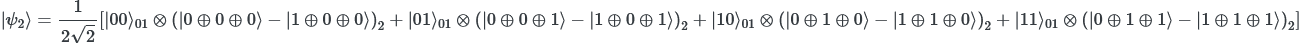

Simplificando esto obtenemos:

$$\vert\psi_{2}\rangle =\frac{1}{2\sqrt{2}}\left[\vert 00\rangle_{01}\otimes\left(\vert 0\rangle -\vert 1\rangle\right)_{2}-\vert 01\rangle_{01}\otimes\left(\vert 0\rangle -\vert 1\rangle\right)_{2}-\vert 10\rangle_{01}\otimes\left(\vert 0\rangle -\vert 1\rangle\right)_{2}+\vert 11\rangle_{01}\otimes\left(\vert 0\rangle -\vert 1\rangle\right)_{2}\right]$$

factorizando obtenemos

\begin{align}
\vert\psi_{2}\rangle & =\frac{1}{2}\left(\vert 00\rangle -\vert 01\rangle -\vert 10\rangle +\vert 11\rangle\right)_{01}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{2}\\\\
& = \frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{0}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{1}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle -\vert 1\rangle\right)_{2}
\end{align}

**4.** Aplicamos Hadamard al primer registro

\begin{split}
\vert\psi_{3}\rangle &=\vert 1\rangle_{0}\otimes\vert 1\rangle_{1}\otimes\frac{1}{\sqrt{2}}\left(\vert 0\rangle-\vert 1\rangle\right)_{2}\\
& = \vert 11\rangle_{01}\otimes\vert -\rangle_{2}
\end{split}

**5.** La medición de los dos primeros qubits dará como resultado un valor distinto de cero: $11$, lo que indica que es una **función balanceada**.

A continuación, creamos un **oráculo balanceado**. Como vimos, podemos crear un oráculo balanceado realizando $CNOT$ con cada cúbit de entrada como control y el bit de salida como objetivo. Podemos variar los estados de entrada que dan 0 o 1 envolviendo algunos de los controles en compuertas $X$. Primero, elijamos una cadena binaria de longitud $n$ que indique qué controles envolver:

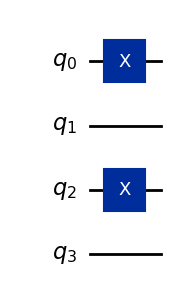

In [ ]:
# set the length of the n-bit input string.
n = 3
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Ahora que tenemos esta cadena, la cual podemos usar como clave para colocar nuestras compuertas X.
# Para cada qubit en nuestro circuito, colocamos una puerta X si el dígito correspondiente en b_str es 1,
# o no hacemos nada si el dígito es 0.

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)
balanced_oracle.draw('mpl')

A continuación, generamos nuestras compuertas $CNOT$, utilizando cada **qubit de entrada como control** y el **qubit de salida como objetivo**:

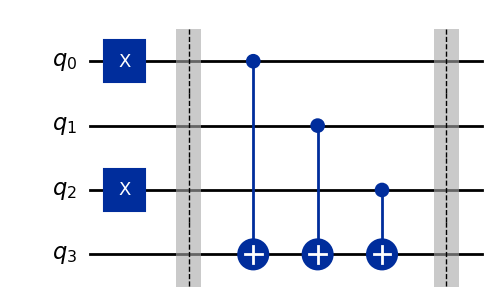

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
  balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()
balanced_oracle.draw('mpl')

Finalmente, repetimos el código desde dos celdas hacia arriba para terminar de envolver los controles en $CX$:

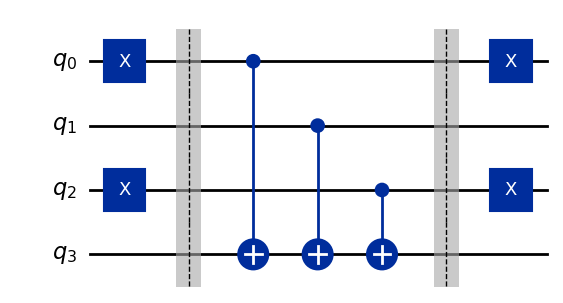

In [ ]:
balanced_oracle = QuantumCircuit(n+1)
b_str = "101"

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Use barrier as divider
balanced_oracle.barrier()

# Controlled-NOT gates
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

balanced_oracle.barrier()

# Place X-gates
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)


# Show oracle
balanced_oracle.draw('mpl')

**¡Acabamos de crear un oráculo balanceado!** Solo queda ver si el algoritmo Deutsch-Jozsa puede resolverlo.

# **Implementación en Qiskit**

Ahora, integremos todo. El primer paso del algoritmo consiste en inicializar los qubits de entrada en el estado $|+⟩$ y el qubit de salida en el estado $|-⟩$.

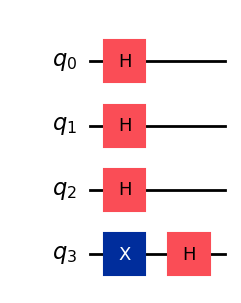

In [ ]:
dj_circuit = QuantumCircuit(n+1)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

dj_circuit.draw('mpl')

In [ ]:
Statevector(dj_circuit).draw('latex', max_size = 16, prefix="\\vert\\psi_0\\rangle = ")

<IPython.core.display.Latex object>

A continuación, apliquemos el oráculo. Aquí aplicamos el
`balanced_oracle` que creamos anteriormente:

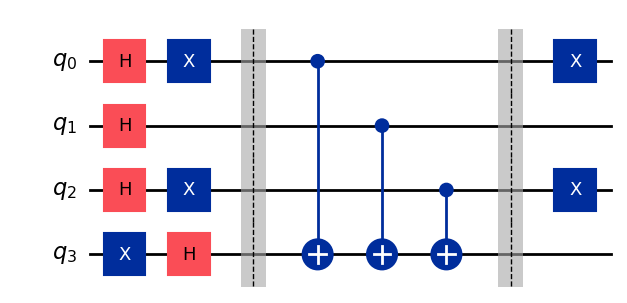

In [ ]:
# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)
dj_circuit.draw('mpl')

Finalmente, aplicamos las compuertas $H$ en los $n$ qubits de entrada y medimos nuestro registro de entrada:

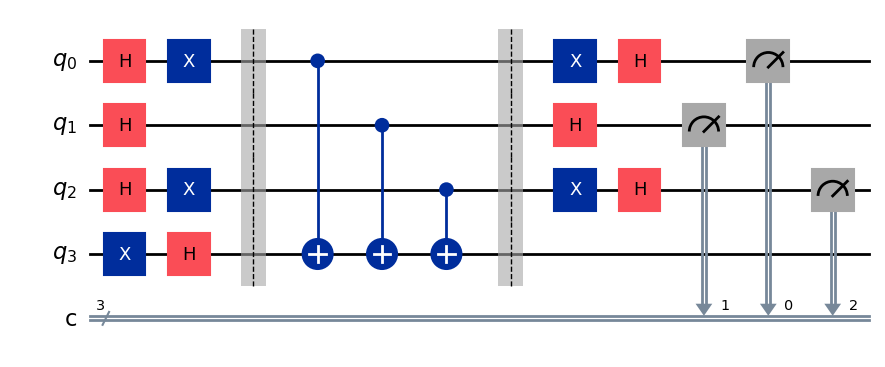

In [ ]:
dj_circuit = QuantumCircuit(n+1,n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(balanced_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

# Display circuit
dj_circuit.draw('mpl')

In [ ]:
# Statevector(dj_circuit).draw('latex', max_size = 16, prefix="\\vert\\psi_1\\rangle = ")

Veamos el resultado:

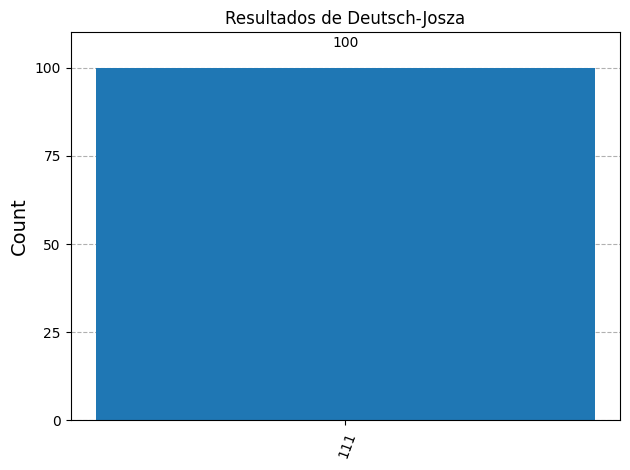

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(dj_circuit, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch-Josza")

De los resultados anteriores, podemos ver que tenemos un 100% de probabilidad de medir 111. Esto predice correctamente que la función está balanceada.

# **Oráculo constante**

Cuando el oráculo es **constante**, no tiene efecto (hasta una fase global) en los qubits de entrada, y los estados cuánticos antes y después de consultar el oráculo son los mismos. Dado que la compuerta $H$ es su propia inversa, en el paso 4 invertimos el paso 2 para obtener el estado cuántico inicial de $|00....0⟩$ en el primer registro.

$$H^{\otimes n}\begin{bmatrix}1\\ 0\\ 0\\ \vdots\\ 0\end{bmatrix}=\frac{1}{\sqrt{2^{n}}}\begin{bmatrix}1\\ 1\\ 1\\ \vdots\\ 1\end{bmatrix}\xrightarrow{U_{f}}H^{\otimes n}\frac{1}{\sqrt{2^{n}}}\begin{bmatrix}1\\ 1\\ 1\\ \vdots\\ 1\end{bmatrix}=\begin{bmatrix}1\\ 0\\ 0\\ \vdots\\ 0\end{bmatrix}$$

Comencemos creando un **oráculo constante**, en este caso la entrada no tiene efecto en la salida, por lo que simplemente establecemos aleatoriamente el qubit de salida en 0 o 1:

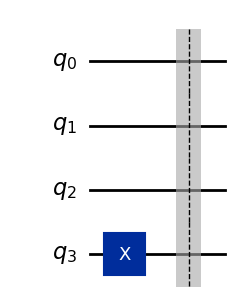

In [ ]:
def deutsch_jozsa_constant_oracle(n, c):
    """
    Devuelve un circuito cuántico que implementa un oráculo constante para el algoritmo Deutsch-Jozsa.

    Parámetros:
        n (int): Número de qubits en el registro de entrada (no incluye el auxiliar).
        c (int): Valor constante de la función, debe ser 0 o 1.

    Retorna:
        QuantumCircuit: El circuito del oráculo.
    """
    oracle = QuantumCircuit(n + 1)  # n qubits de entrada + 1 qubit auxiliar

    if c == 1:
        # Aplicamos X al qubit auxiliar si f(x) = 1
        oracle.x(n)  # El qubit auxiliar es el último

    oracle.barrier()
    return oracle

n = 3  # Número de qubits de entrada
constante = 1  # f(x) = 1 para todo x

oracle_const = deutsch_jozsa_constant_oracle(n, constante)
oracle_const.draw('mpl')

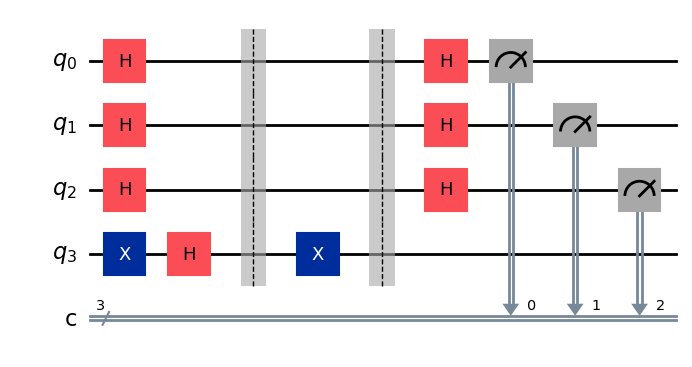

In [ ]:
# Crear el circuito Deutsch-Jozsa
djc_circuit = QuantumCircuit(n+1, n)

# Aplicar Hadamard a los qubits de entrada
for qubit in range(n):
    djc_circuit.h(qubit)

# Poner el último qubit en estado |-> (X seguido de H)
djc_circuit.x(n)
djc_circuit.h(n)

djc_circuit.barrier()

# Agregar el oráculo constante
djc_circuit.compose(oracle_const, inplace = True)


# Aplicar Hadamard a los qubits de entrada nuevamente
for qubit in range(n):
    djc_circuit.h(qubit)

# Medir los n primeros qubits
for i in range(n):
    djc_circuit.measure(i, i)

# Dibujar el circuito

djc_circuit.draw('mpl')


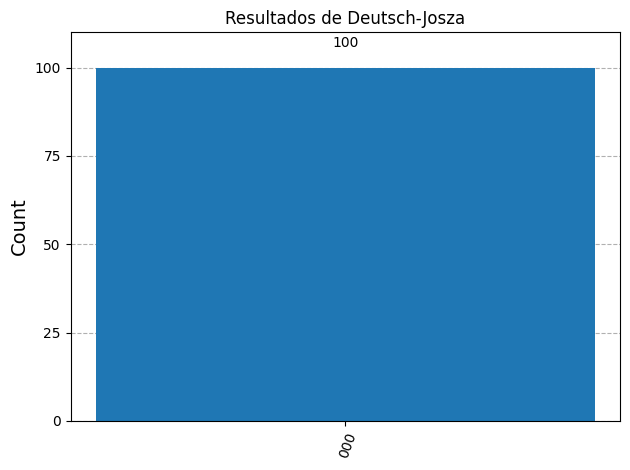

In [ ]:
## Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(djc_circuit, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch-Josza")

## **Simulación en computadoras cuánticas reales**

In [ ]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.2/366.2 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 10.6 MB/s eta 0:00:00


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
service = QiskitRuntimeService(channel="ibm_cloud", token="", instance="")
backend = service.backend('ibm_torino') # ibm_brisbane
print(backend)

<IBMBackend('ibm_torino')>


In [ ]:
backends = service.backends(operational=True, min_num_qubits=10)
for backend in backends:
    print(backend.name, backend.status().pending_jobs)

ibm_torino 5333
ibm_brisbane 1809


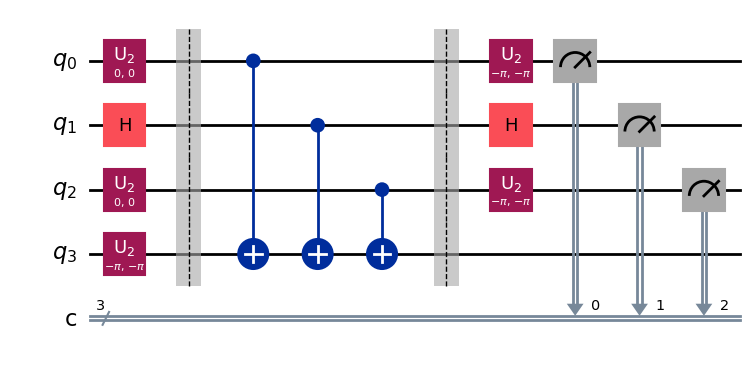

In [ ]:
backend = AerSimulator()

qc_transpiled = transpile(dj_circuit, backend, optimization_level=3)

qc_transpiled.draw('mpl', idle_wires=False)

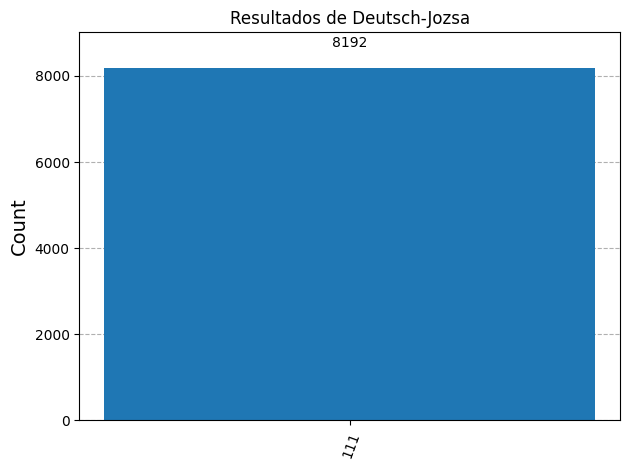

In [ ]:
# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit = transpile(qc_transpiled, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit, shots=8192)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch-Jozsa")

## **Caso constante**

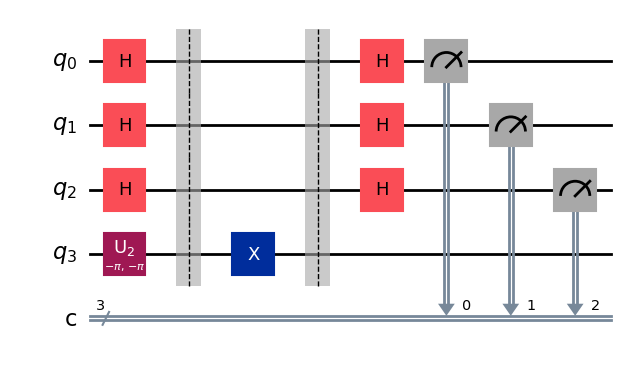

In [ ]:
backend = AerSimulator()

qcc_transpiled = transpile(djc_circuit, backend, optimization_level=3)

qcc_transpiled.draw('mpl', idle_wires=False)

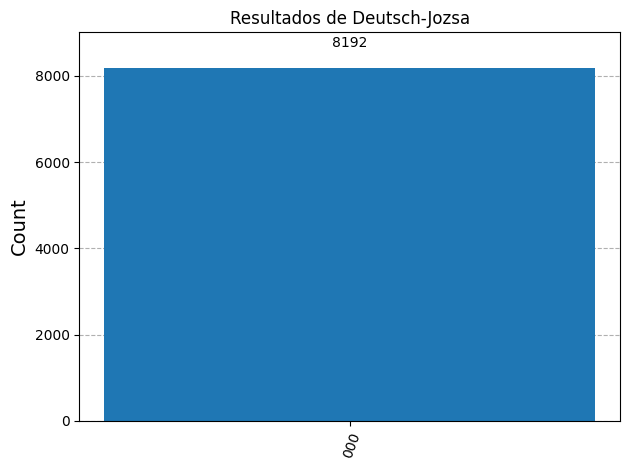

In [ ]:
# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit_cc = transpile(qcc_transpiled, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit_cc, shots=8192)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch-Jozsa")

## **Casos particulares**

In [ ]:
import numpy as np

In [ ]:
def dj_oracle(case, n):
    # We need to make a QuantumCircuit object to return
    # This circuit has n+1 qubits: the size of the input,
    # plus one output qubit
    oracle_qc = QuantumCircuit(n+1)

    # First, let's deal with the case in which oracle is balanced
    if case == "balanced":
        # First generate a random number that tells us which CNOTs to
        # wrap in X-gates:
        b = np.random.randint(1,2**n)
        # Next, format 'b' as a binary string of length 'n', padded with zeros:
        b_str = format(b, '0'+str(n)+'b')
        # Next, we place the first X-gates. Each digit in our binary string
        # corresponds to a qubit, if the digit is 0, we do nothing, if it's 1
        # we apply an X-gate to that qubit:
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)
        # Do the controlled-NOT gates for each qubit, using the output qubit
        # as the target:
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
        # Next, place the final X-gates
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                oracle_qc.x(qubit)

    # Case in which oracle is constant
    if case == "constant":
        # First decide what the fixed output of the oracle will be
        # (either always 0 or always 1)
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)

    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle" # To show when we display the circuit
    return oracle_gate

In [ ]:
def dj_algorithm(oracle, n):
    djg_circuit = QuantumCircuit(n+1, n)
    # Set up the output qubit:
    djg_circuit.x(n)
    djg_circuit.h(n)
    # And set up the input register:
    for qubit in range(n):
        djg_circuit.h(qubit)
    # Let's append the oracle gate to our circuit:
    djg_circuit.append(oracle, range(n+1))
    # Finally, perform the H-gates again and measure:
    for qubit in range(n):
        djg_circuit.h(qubit)

    for i in range(n):
        djg_circuit.measure(i, i)

    return djg_circuit

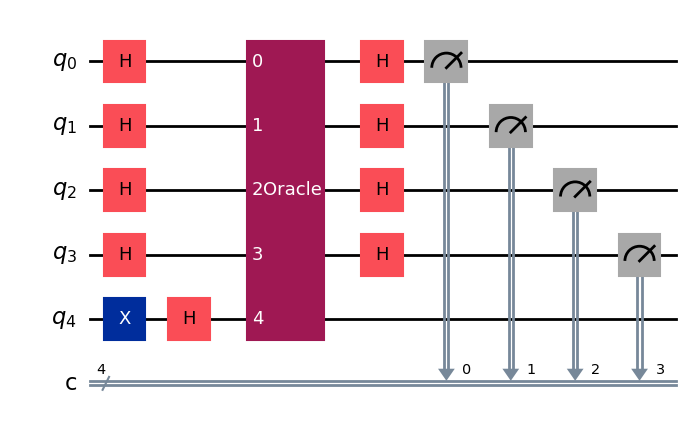

In [ ]:
n = 4
oracle_gate = dj_oracle('balanced', n)
djgc_circuit = dj_algorithm(oracle_gate, n)
djgc_circuit.draw('mpl')

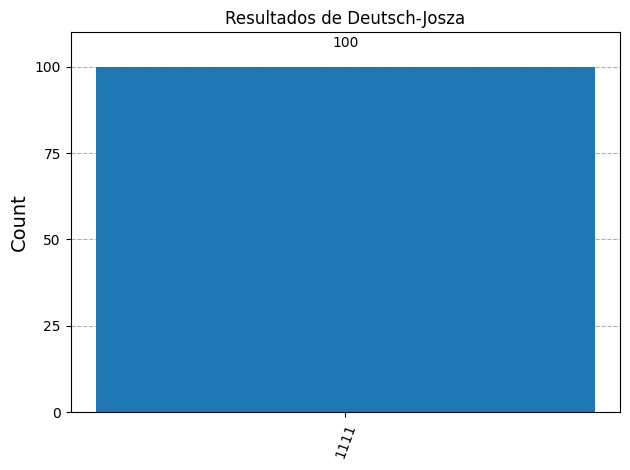

In [ ]:
# Número de shots (veces que se ejecuta el circuito)
shots = 100

# Crear el simulador
simulator = AerSimulator()

# Transpilar el circuito para optimizarlo en el simulador
compiled_circuit_gc = transpile(djgc_circuit, simulator)

# Ejecutar el circuito en el simulador
job = simulator.run(compiled_circuit_gc, shots=shots)

# Obtener resultados
result = job.result()
counts = result.get_counts()

# Dibujar histograma
plot_histogram(counts, title="Resultados de Deutsch-Josza")